In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
df_train = pd.read_csv("Dataset/kendaraan_train.csv")
df_train.drop(['id'], axis=1, inplace=True)

print("Total Dataset :", len(df_train))
df_train.sample(5)

Total Dataset : 285831


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
222575,Pria,62.0,1.0,28.0,0.0,> 2 Tahun,Pernah,38093.0,157.0,270.0,0
117039,Wanita,45.0,1.0,28.0,0.0,1-2 Tahun,Pernah,43550.0,124.0,282.0,0
94047,Wanita,22.0,1.0,13.0,1.0,< 1 Tahun,Tidak,25841.0,152.0,249.0,0
52979,Pria,34.0,1.0,41.0,1.0,1-2 Tahun,Tidak,28534.0,152.0,52.0,0
206082,Wanita,30.0,1.0,30.0,1.0,< 1 Tahun,Tidak,29802.0,152.0,202.0,0


In [3]:
df_test = pd.read_csv("Dataset/kendaraan_test.csv")

print("Total Dataset :", len(df_test))
df_test.sample(5)

Total Dataset : 47639


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
31292,Pria,27,1,50,0,1-2 Tahun,Pernah,40199,8,259,0
23743,Wanita,42,1,20,0,1-2 Tahun,Pernah,2630,156,145,1
25742,Wanita,27,1,28,1,< 1 Tahun,Tidak,27690,152,35,0
46665,Pria,29,1,28,1,< 1 Tahun,Tidak,30911,152,46,0
34276,Pria,35,1,15,0,1-2 Tahun,Pernah,32884,124,22,1


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      271391 non-null  object 
 1   Umur               271617 non-null  float64
 2   SIM                271427 non-null  float64
 3   Kode_Daerah        271525 non-null  float64
 4   Sudah_Asuransi     271602 non-null  float64
 5   Umur_Kendaraan     271556 non-null  object 
 6   Kendaraan_Rusak    271643 non-null  object 
 7   Premi              271262 non-null  float64
 8   Kanal_Penjualan    271532 non-null  float64
 9   Lama_Berlangganan  271839 non-null  float64
 10  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 24.0+ MB


In [5]:
df_train.isna().sum()


Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [6]:
df_test.isna().sum()


Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [7]:
duplicate = list(df_train.duplicated())
print("Data Duplikasi :", duplicate.count(True))

Data Duplikasi : 169


In [8]:
df_train.drop_duplicates(inplace=True)

In [9]:
duplicate = list(df_train.duplicated())
print("Data Duplikasi :", duplicate.count(True))

Data Duplikasi : 0


## **Label Encoding**


In [10]:
def label_encoding(df):
    df['Jenis_Kelamin'] = df['Jenis_Kelamin'].replace(['Wanita', 'Pria'], [0, 1])
    df['Umur_Kendaraan'] = df['Umur_Kendaraan'].replace(['< 1 Tahun', '1-2 Tahun', '> 2 Tahun'], [0, 1, 2])
    df['Kendaraan_Rusak'] = df['Kendaraan_Rusak'].replace(['Tidak', 'Pernah'], [0, 1])

label_encoding(df_train)
label_encoding(df_test)


In [11]:
# -2 Ke 2 Diisi Mean Berdasarkan Skewnessn Selain Itu Median
df_train['SIM'] = df_train['SIM'].fillna(df_train['SIM'].median())
df_train = df_train.fillna(df_train.mean())


In [12]:
df_train.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

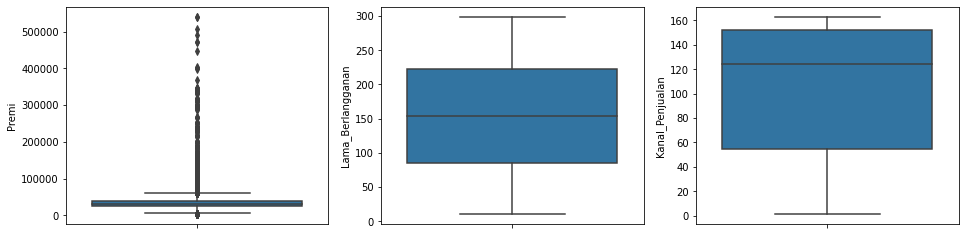

In [13]:
fig, ax = plt.subplots(ncols=3, figsize=(16, 4))
sns.boxplot(y='Premi', data=df_train, ax=ax[0])
sns.boxplot(y='Lama_Berlangganan', data=df_train, ax=ax[1])
sns.boxplot(y='Kanal_Penjualan', data=df_train, ax=ax[2])
plt.show()


Batas Atas :  59721.625
Batas Bawah :  4066.625


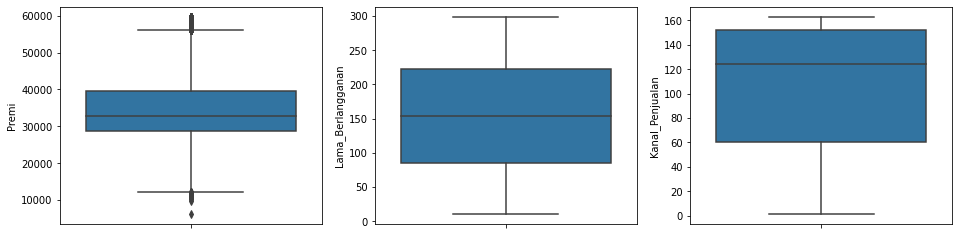

In [14]:
Q1 = df_train["Premi"].quantile(0.25)
Q3 = df_train["Premi"].quantile(0.75)
IQR = Q3 - Q1

BB = Q1 - (1.5 * IQR)
BA = Q3 + (1.5 * IQR)

print("Batas Atas : ", BA)
print("Batas Bawah : ", BB)

df_train = df_train[~((df_train["Premi"] < BB) | (df_train["Premi"] > BA))]

fig, ax = plt.subplots(ncols=3, figsize=(16, 4))
sns.boxplot(y='Premi', data=df_train, ax=ax[0])
sns.boxplot(y='Lama_Berlangganan', data=df_train, ax=ax[1])
sns.boxplot(y='Kanal_Penjualan', data=df_train, ax=ax[2])
plt.show()


## **Min Max Scaler**

In [15]:
numerical = [
    'Premi', 'Lama_Berlangganan', 'Umur', 'Kode_Daerah', 'Kanal_Penjualan', 
    'Jenis_Kelamin', 'SIM', 'Kendaraan_Rusak', 'Sudah_Asuransi', 'Umur_Kendaraan'
]

scaler = StandardScaler()

df_train[numerical] = scaler.fit_transform(df_train[numerical].values)
df_train.sample(5)


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
179523,-1.099543,1.044288,0.044705,0.119618,-0.982998,0.755505,1.051748,2.248904,-1.647398,-0.076711,0
5970,0.957913,0.041243,0.044705,0.119618,-0.982998,0.755505,1.051748,-0.382787,0.223363,-0.382893,0
266385,0.957913,-0.875367,0.044705,0.434297,-0.982998,-1.049090,1.051748,-0.457834,0.910581,-0.284915,0
149127,-1.099543,0.713313,0.044705,0.119618,1.070422,0.755505,-1.000477,-0.493660,0.223363,1.527687,0
122054,-1.099543,-1.140147,0.044705,-0.005783,1.070422,-1.049090,-1.000477,0.236675,0.910581,0.829590,0


In [16]:
df_test[numerical] = scaler.transform(df_test[numerical].values)
df_test.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
36027,0.957913,-0.544392,0.044705,-1.453781,-0.982998,-1.049090,1.051748,1.161245,0.967849,0.315203,0
39318,-1.099543,-0.941562,0.044705,-0.667081,1.070422,-1.049090,-1.000477,0.804858,0.757866,1.650160,0
32775,0.957913,0.713313,0.044705,-1.453781,1.070422,0.755505,-1.000477,0.747957,-1.647398,1.466450,0
12605,-1.099543,-0.809172,0.044705,-1.611120,1.070422,-1.049090,-1.000477,0.657807,0.757866,1.086784,0
29001,0.957913,-1.140147,0.044705,-0.903091,-0.982998,-1.049090,1.051748,-0.277416,0.910581,-0.346151,0


In [17]:
df_train_pca = df_train.copy()
df_test_pca = df_test.copy()

df_label_train = df_train['Tertarik']
df_label_test = df_test['Tertarik']

del df_train_pca['Tertarik']
del df_test_pca['Tertarik']


In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
component = pca.fit_transform(df_train_pca)
component_test = pca.transform(df_test_pca)

df_train_pca = pd.DataFrame(data=component, columns=['Component_1', 'Component_2'])
df_train_pca['Tertarik'] = df_label_train.values

df_test_pca = pd.DataFrame(data=component_test, columns=['Component_1', 'Component_2'])
df_test_pca['Tertarik'] = df_label_test.values

df_train_pca.sample(5)

,Component_1,Component_2,Tertarik
115472,-2.006328,0.468654,0
31197,0.914143,-1.225218,1
89843,-0.167326,1.628612,0
83406,-2.035756,0.399173,0
16502,2.157348,-0.253012,0


In [19]:
df_train.to_csv('Dataset/kendaraan_train_clean.csv', index=False)
df_test.to_csv('Dataset/kendaraan_test_clean.csv', index=False)

df_train_pca.to_csv('Dataset/kendaraan_train_pca_clean.csv', index=False)
df_test_pca.to_csv('Dataset/kendaraan_test_pca_clean.csv', index=False)
